In [2]:
!pip install seaborn



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Obtaining dependency information for matplotlib!=3.6.1,>=3.4 from https://files.pythonhosted.org/packages/d2/92/c2b9464a0562feb6ae780bdc152364810862e07ef5e6affa2b7686028db2/matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/0c/89/9830ba00d88e43d15e53d64931e66b8792b46eb25e2050a88fec4a0df3d5/contourpy-1.3.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/6d/9a/b695930e1b4e6929cc60e294489421632a05c105a

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import s3_file_operations as s3_ops

In [4]:
# Load the transformed data from S3
bucket = "de-masterclass-shisia"
characters_df = s3_ops.read_csv_from_s3(bucket, 'Rick&Morty/Transformed/Character.csv')
episodes_df = s3_ops.read_csv_from_s3(bucket, 'Rick&Morty/Transformed/Episode.csv')
appearance_df = s3_ops.read_csv_from_s3(bucket, 'Rick&Morty/Transformed/Appearance.csv')
location_df = s3_ops.read_csv_from_s3(bucket, 'Rick&Morty/Transformed/Location.csv')

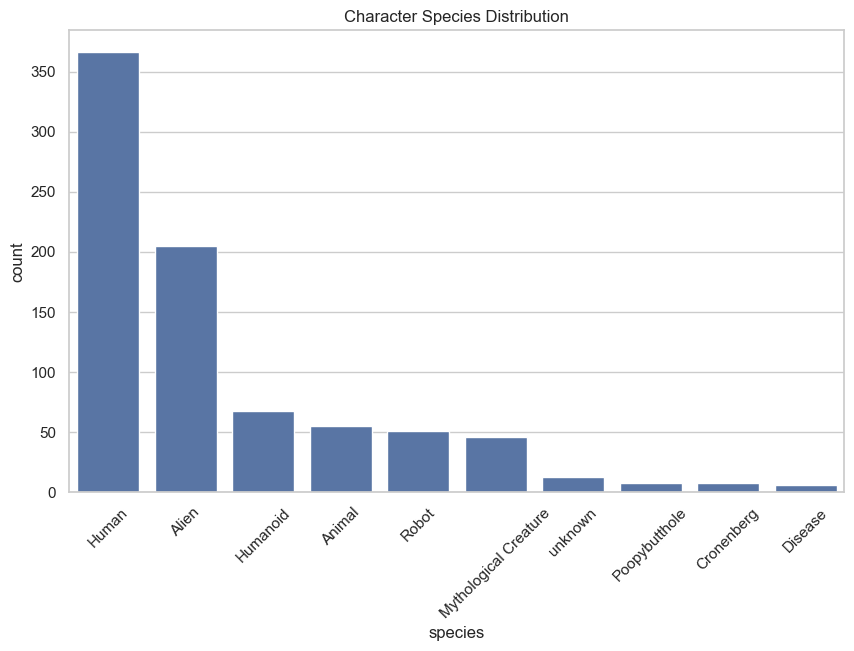

In [14]:
# Set Seaborn style
sns.set(style='whitegrid')

# 1. Character Species Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=characters_df, x='species', order=characters_df['species'].value_counts().index)
plt.title('Character Species Distribution')
plt.xticks(rotation=45)
plt.show()


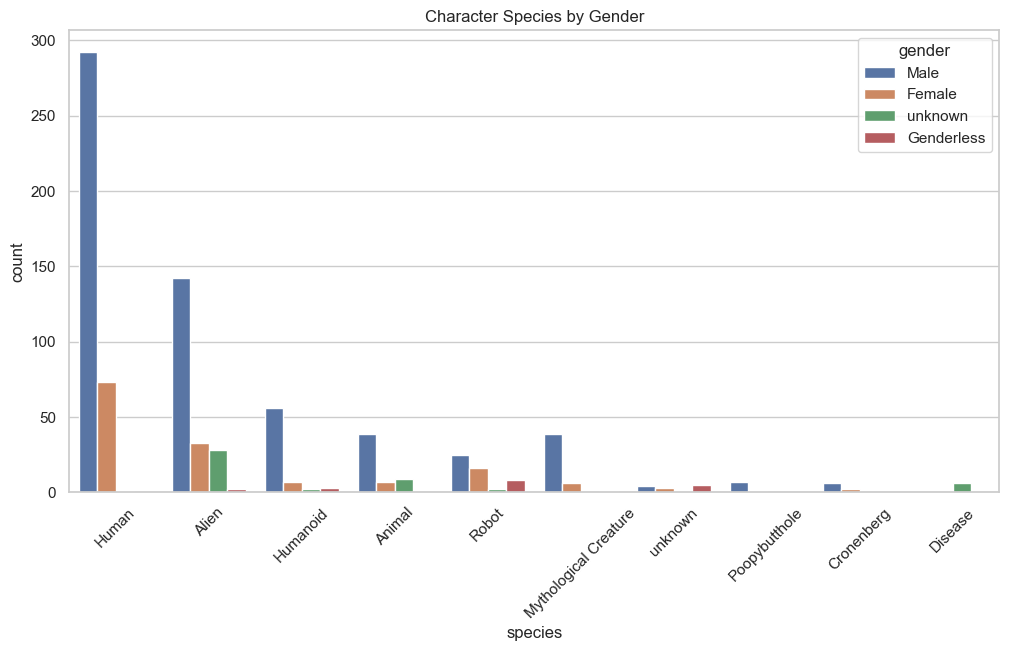

In [17]:
# 2. Characters by Species and Gender
plt.figure(figsize=(12, 6))
sns.countplot(data=characters_df, x='species', hue='gender', order=characters_df['species'].value_counts().index)
plt.title('Character Species by Gender')
plt.xticks(rotation=45)
plt.show()

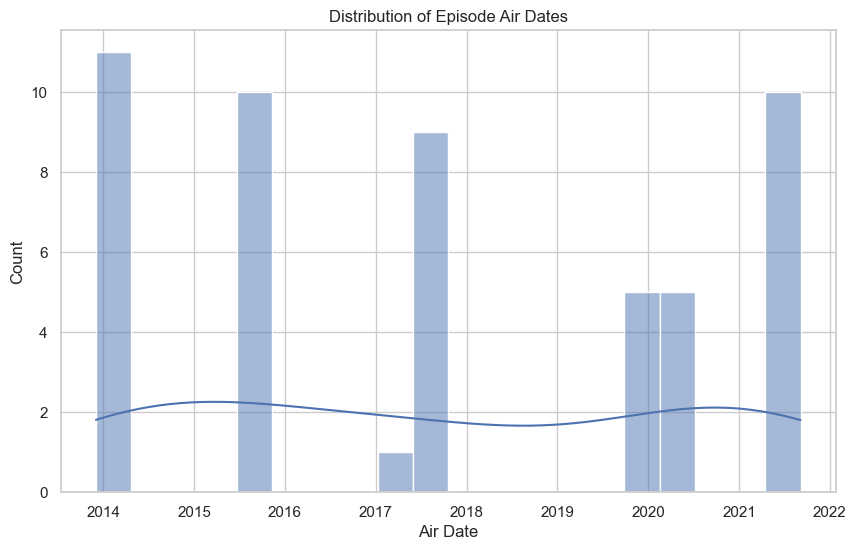

In [22]:
# 3. Distribution of Episode Air Dates
plt.figure(figsize=(10, 6))
sns.histplot(pd.to_datetime(episodes_df['air_date']), bins=20, kde=True)
plt.title('Distribution of Episode Air Dates')
plt.xlabel('Air Date')
plt.show()

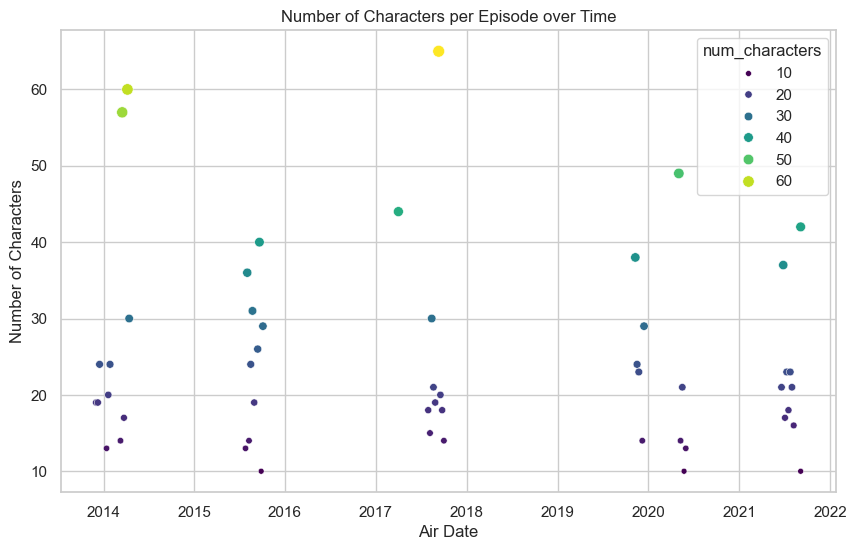

In [25]:
# 4. Relationship between Episode Air Date and Number of Characters Appearing
merged_char_episode_date = pd.merge(episodes_df[['id', 'air_date']], char_per_episode, left_on='id', right_on='episode_id', how='left')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pd.to_datetime(merged_char_episode_date['air_date']), y=merged_char_episode_date['num_characters'], hue=merged_char_episode_date['num_characters'], palette='viridis', size=merged_char_episode_date['num_characters'])
plt.title('Number of Characters per Episode over Time')
plt.xlabel('Air Date')
plt.ylabel('Number of Characters')
plt.show()

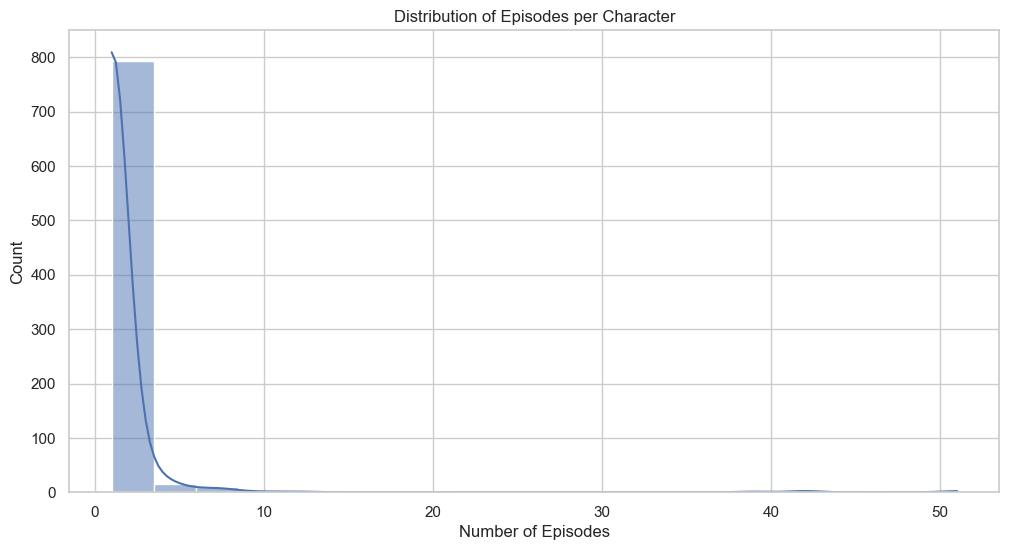

In [20]:
# 5. Number of Episodes per Character
char_episode_count = appearance_df.groupby('character_id')['episode_id'].count().reset_index().rename(columns={'episode_id': 'num_episodes'})
merged_char_episode = pd.merge(characters_df[['id', 'name']], char_episode_count, left_on='id', right_on='character_id', how='left').fillna(0)

plt.figure(figsize=(12, 6))
sns.histplot(merged_char_episode['num_episodes'], bins=20, kde=True)
plt.title('Distribution of Episodes per Character')
plt.xlabel('Number of Episodes')
plt.show()